# Name: Harsh Siddhapura
# ASU ID: 1230169813

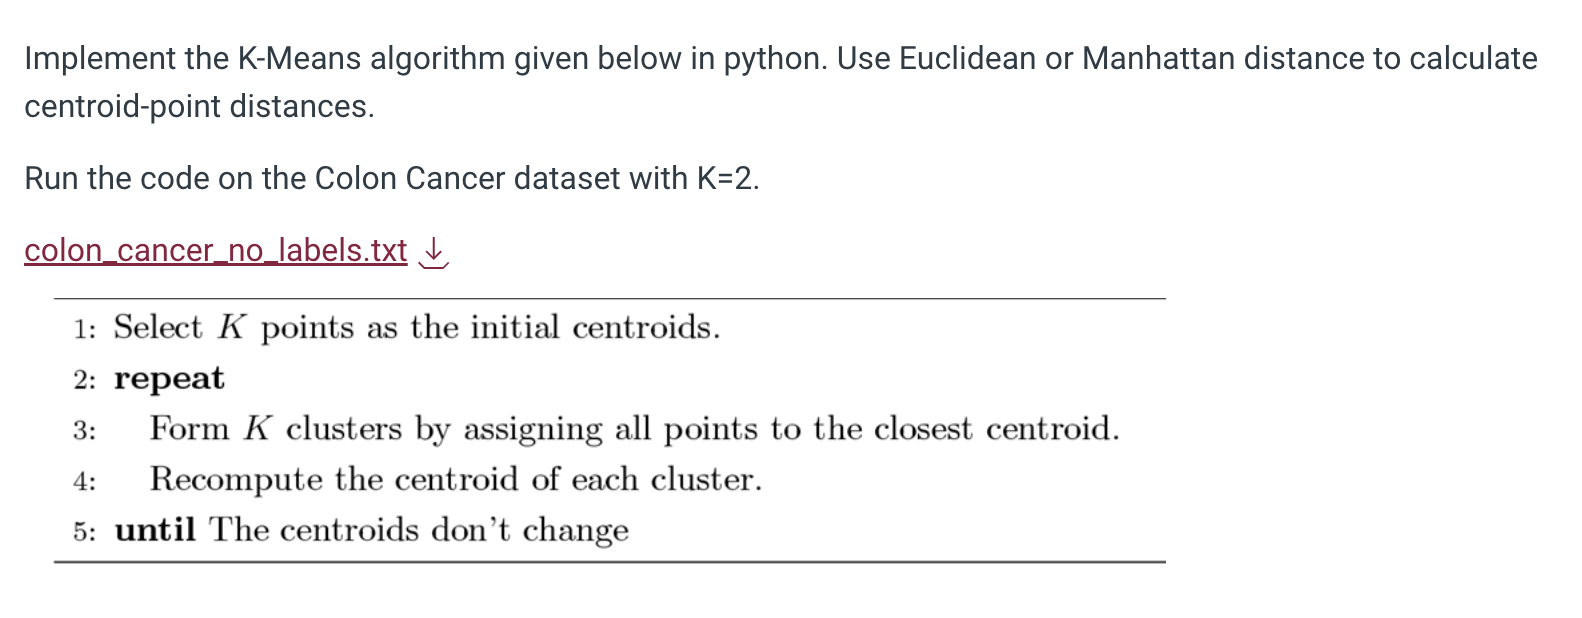

In [1]:
import numpy as np

# Function to calculate Euclidean distance between two points
def calculate_distance(pointA, pointB):
    return np.sqrt(np.sum((pointA - pointB) ** 2))

# Function to assign each data point to the nearest centroid
def assign_to_centroids(dataset, centroids):
    assigned_centroids = []
    for data_point in dataset:
        distances = [calculate_distance(data_point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        assigned_centroids.append(closest_centroid)
    return assigned_centroids

# Function to update the centroids based on the mean of the points assigned to them
def recalculate_centroids(dataset, assigned_centroids, num_centroids):
    updated_centroids = []
    for centroid in range(num_centroids):
        points_in_cluster = [dataset[i] for i in range(len(dataset)) if assigned_centroids[i] == centroid]
        new_centroid = np.mean(points_in_cluster, axis=0)
        updated_centroids.append(new_centroid)
    return updated_centroids

# K-Means algorithm implementation
def k_means_clustering(dataset, num_centroids, max_iterations=100):
    # Step 1: Select K points as the initial centroids
    np.random.seed(42)
    centroids = dataset[np.random.choice(dataset.shape[0], num_centroids, replace=False), :]
    
    while True:
        # Step 3: Form K clusters by assigning all points to the closest centroid
        assigned_centroids = assign_to_centroids(dataset, centroids)
        
        # Step 4: Recompute the centroid of each cluster
        new_centroids = recalculate_centroids(dataset, assigned_centroids, num_centroids)
        
        # Step 5: Check if centroids have changed, if not, then we have converged
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return assigned_centroids, centroids

# Load dataset from file
dataset = np.loadtxt("colon_cancer_no_labels.txt")

# Set number of clusters
num_centroids = 2

# Run K-Means algorithm
assigned_centroids, centroids = k_means_clustering(dataset, num_centroids)

# Print cluster assignments and centroids
print("Cluster Assignments:", assigned_centroids)
print("Centroids:", centroids)


Cluster Assignments: [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
Centroids: [array([-0.239424  , -0.39163683, -0.37135606, ..., -0.18690122,
       -0.15905764,  0.3522225 ]), array([ 0.33151058,  0.54226662,  0.51418496, ...,  0.25878631,
        0.22023404, -0.48769269])]
